# Laptops Pricing

## About the Dataset

| Parameter | Description | Mapped Value |
|---|---|---|
| Manufacturer | The company that manufactured the laptop. | N/A |
| Category | The category to which the laptop belongs. | Gaming: 1, Netbook: 2, Notebook: 3, Ultrabook: 4, Workstation: 5 |
| GPU | The manufacturer of the GPU. | AMD: 1, Intel: 2, NVIDIA: 3 |
| OS | The operating system type (Windows or Linux). | Windows: 1, Linux: 2 |
| CPU_core | The type of processor used in the laptop. | Intel Pentium i3: 3, Intel Pentium i5: 5, Intel Pentium i7: 7 |
| Screen_Size_cm | The size of the laptop screen is recorded in cm. | N/A |
| CPU_frequency | The frequency at which the CPU operates, in GHz. | N/A |
| RAM_GB | The size of the RAM of the system in GB. | N/A |
| Storage_GB_SSD | The size of the SSD storage in GB is installed in the laptop. | N/A |
| Weight_kg | The weight of the laptop is in kgs. | N/A |

## Data Preparation

### Load Data and Explore the Dataset

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)

#### Displaying the top 5 rows

In [3]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


#### Find out the number of rows and columns

In [5]:
df.shape

(238, 13)

- **Number of rows (observations)**: There are 238 rows, which means there are 238 data points or observations represented in the data.
- **Number of columns (features)**: There are 13 columns, which means there are 13 features or variables describing each data point.

#### Identify the data types of each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


- This DataFrame contains data for 238 laptops with 13 features that describe their specifications and price.
- Most features have complete data for all laptops, but there are a few missing values in columns like **"Screen_Size_cm"** and **"Weight_kg"**.

#### Rounded the decimal value

In [7]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


#### Drop unnecessary column

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Data Wrangling

#### Check the missing data

In [11]:
missing_data_counts = df.isnull().sum()
print(missing_data_counts)

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


As observed before, columns like "Screen_Size_cm" and "Weight_kg" have missing values. This missing data needs to be handled.

#### Replace missing values with mean

In [12]:
avg_weight = df['Weight_kg'].astype(float).mean(axis=0)

df['Weight_kg'].replace(np.nan, avg_weight, inplace = True)

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


Missing values in attributes that have continuous data are best replaced using Mean value. The **"Weight_kg"** column no longer shows any missing values. All previously missing values were replaced with the calculated average weight. 

This approach is a simple and common way to handle missing values because it reduces bias compared to ignoring missing values or replacing them with a constant value. It keeps the overall sum of the Weight_kg column closer to reality. This method can be used for handling missing data but it assumes all missing values are equal to the average, which might not be true. This can distort the true distribution of the data, especially if the missing values follow a different pattern. It can also bias the distribution towards the center, masking potential outliers or skewness.

#### Replace missing values with the most frequent value

In [13]:
frq_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

df['Screen_Size_cm'].replace(np.nan, frq_screen_size, inplace=True)

df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.20,1016
6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.10,1117
7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.20,866
8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.30,812
9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.20,1068


The **"Screen_Size_cm"** column no longer shows any missing values. All previously missing values were replaced with the most frequent value. This approach is another common way to handle missing values, but it also has its advantages and disadvantages.
- **Advantages**: It's simple and easy to implement, and it preserves the overall distribution of the feature better than using the mean if the missing values are randomly distributed.
- **Disadvantages**: It assumes that the missing values are the same as the most frequent value, which might not be true. This can distort the true distribution of the data if the missing values follow a different pattern. It can also bias the analysis towards the more frequent category, potentially masking outliers or underrepresented groups.

#### Fixing data types

In [14]:
df[['Screen_Size_cm', 'Weight_kg']] = df[['Screen_Size_cm', 'Weight_kg']].astype(float)

#### Data standardization

In [15]:
# Data Standardization: convert weight from kg to pounds
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

#Data Standardization: convert screen size from cm to inch
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


Data standardization is an important pre-processing step in data analysis because it improves attributes scallability and reduces biases. in this case, converting **weight** to **pounds** are common measurement used. on the other hand, converting **screen size** to **inches** aligns with the common display size measurements.

#### Data normalization

In [16]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837


normalizing the ``CPU_frequency`` feature can lead to improved model performance, fairer feature comparison, and better interpretability. 

it can be achieved by dividing each data point in the ``CPU_frequency`` column by the maximum value within the entire column. 

This essentially scales each value between 0 and 1, where 0 represents the minimum frequency and 1 represents the maximum frequency.

#### Binning

In [17]:
bins = np.linspace(min(df['Price']), max(df['Price']), 4)

group_names = ['Low', 'Medium', 'High']

df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


The **Price-binned** column now shows the corresponding label ("Low", "Medium", or "High") for each price point in the original Price column.

binning can be a helpful technique for simplifying data, improving model performance, and facilitating analysis. However, it's important to consider the potential loss of information and choose the binning strategy carefully to avoid introducing bias or misinterpreting the results

plotting the bar graph after binning

Text(0.5, 1.0, 'Price bins')

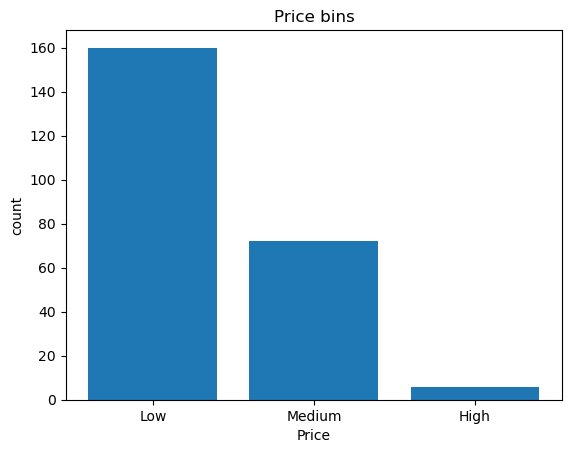

In [18]:
plt.bar(group_names, df['Price-binned'].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

plotting the bar graph after binning is a helpful way to visually understand the distribution of the data within the defined price categories.

The bars clearly indicate that the majority of laptops in dataset fall into the "Low" price bin. There are significantly fewer laptops in the "Medium" and "High" price bins

#### Dummy variable

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [19]:
#Indicator Variable: Screen
dummy_variable = pd.get_dummies(df['Screen'])
dummy_variable.rename(columns={'IPS Panel': 'Screen-IPS_panel', 'FUll HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable], axis = 1)

#Drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Full HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0


DataFrame now has two new columns: ``Screen-IPS_panel`` and ``Screen-Full_HD``, each taking a value of 1 if the corresponding screen type is present and 0 otherwise. The original ``Screen`` attribute is no longer present in the DataFrame

using dummy variables for ``Screen`` are beneficial in data analysis because:

- Many machine learning algorithms only work with numerical data. Dummy variables represent categorical data as numeric values (0 and 1), allowing these algorithms to analyze and utilize them effectively.
- dummy variables are easier to interpret because each column directly represents a specific category and its presence/absence.

## Exploratory Data Analysis (EDA)

### Descriptive statistical analysis

In [20]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Full HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.299213,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [21]:
df.describe(include='object')

,Manufacturer
count,238
unique,11
top,Dell
freq,71


### GroupBy and Pivot Tables

#### Create the group

In [22]:
df_group = df[['GPU','CPU_core','Price']]
grouped = df_group.groupby(['GPU','CPU_core'],as_index=False).mean()
grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


#### Create the Pivot Table

In [23]:
grouped_pivot = grouped.pivot(index='GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

The resulting pivot table shows the average price for each combination of ``GPU`` and ``CPU_core`` count in dataset. 

For example, the cell at the intersection of ``GPU1`` and ``CPU_core3`` ("1769.25") represents the average price of laptops with ``GPU1`` and ``CPU_core3``.

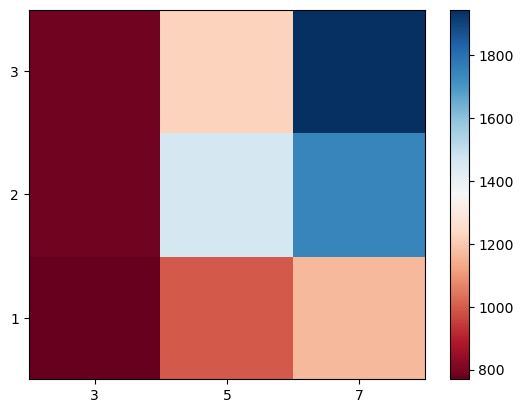

In [24]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

- The provided plot visualizes the data from the pivot table using a color map.
- Redder colors indicate higher average prices, while bluer colors represent lower average prices.
- It identify trends and patterns in the price distribution based on GPU and CPU core combinations.
- For example, it seems that laptops with ``GPU 1`` and ``CPU_cores 3`` are generally more expensive than those with ``GPU 2`` and ``CPU_cores 5``.

### Visualize features

#### Continuous valued features

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

##### CPU frequency plot

(0.0, 3974.15)

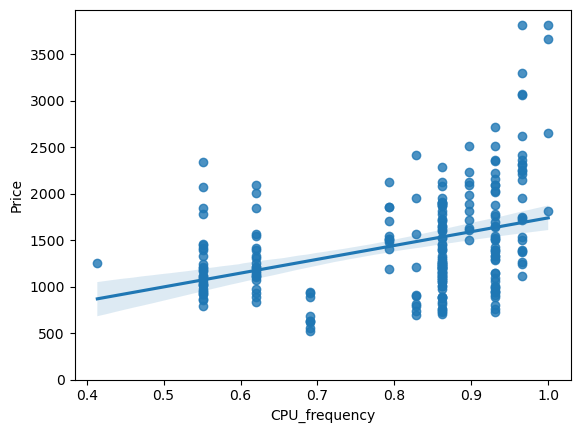

In [25]:
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

The data points form a **positive** trend, indicating that as the ``CPU_frequency`` increases, the ``price`` of the laptops generally tends to **go up** as well.

However, the scatter is **significant**, meaning there are individual laptops with **higher frequencies** that might be cheaper than some with **lower frequencies**. This suggests other factors also influence the ``price`` alongside ``CPU_frequency``.

##### Screen Size Inch plot

(0.0, 3974.15)

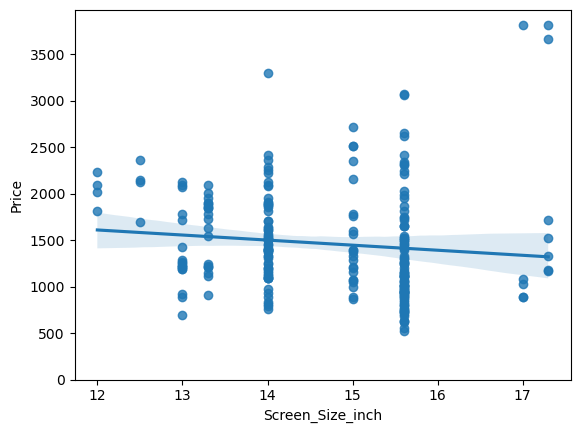

In [26]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)
plt.ylim(0,)

The scatter plot for ``Screen_Size_inch`` and ``Price`` shows a slightly **negative** trend. This suggests that **larger screens** might be slightly cheaper than **smaller screens** on average. 

However, the trend is quite weak and the scatter is substantial. it is consider to be a weak relationship between variables because it shows a flatter trens line

##### Weight Pounds plot

(0.0, 3974.15)

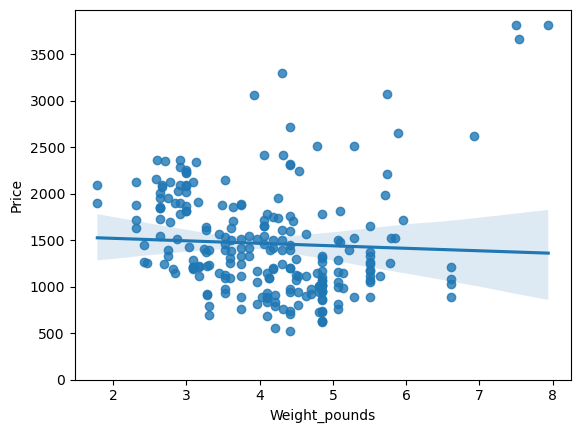

In [27]:
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

The scatter plot for weight and price shows almost no discernible trend. There are laptops across the weight range at all price points. A flatter trend line implies a weaker connection between the variables.

##### Correlation result between CPU_frequency, Screen_Size_inch, Weight_pounds, and Price

In [28]:
correlation_results_data = []

for param in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    correlation_value = df[[param, "Price"]].corr().iloc[0, 1]
    correlation_results_data.append({'Parameter': param, 'Correlation': correlation_value})

correlation_results = pd.DataFrame(correlation_results_data)
correlation_results

,Parameter,Correlation
0,CPU_frequency,0.366666
1,Screen_Size_inch,-0.110565
2,Weight_pounds,-0.050312


The results above provide some information about:

- The correlation coefficient for ``CPU_frequency`` and ``Price`` is 0.367, which indicates a **statistically significant weak positive relationship**. This means that while there's a tendency for ``Price`` to **increase** with ``CPU_frequency``, it's **not a very strong association**. Other factors likely play a more significant role in determining ``Price``.
- The correlation coefficient for ``Screen_Size_inch`` and ``Price`` is -0.111, which confirms a **very weak negative relationship**. This means that ``Screen_Size_inch`` has **almost no statistically significant** impact on ``Price`` in the data.
- The correlation coefficient for ``Weight_pounds`` and ``Price`` is -0.050, again confirming a **very weak** and **statistically insignificant negative relationship**. ``Weight_pounds`` seems to have **negligible impact** on ``Price`` in the data.

#### Categorical features

Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

##### Category Box Plot

<Axes: xlabel='Category', ylabel='Price'>

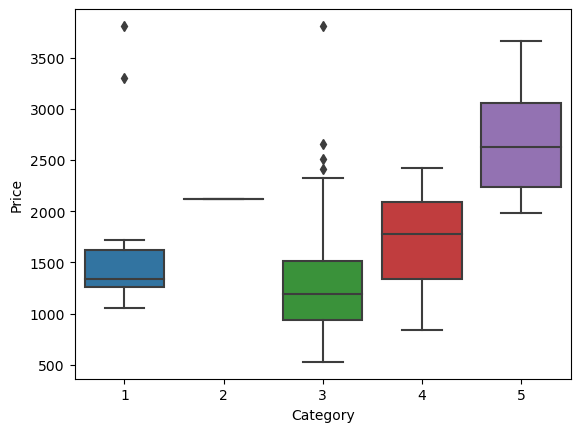

In [29]:
sns.boxplot(x='Category', y='Price', data=df)

##### GPU Box Plot

<Axes: xlabel='GPU', ylabel='Price'>

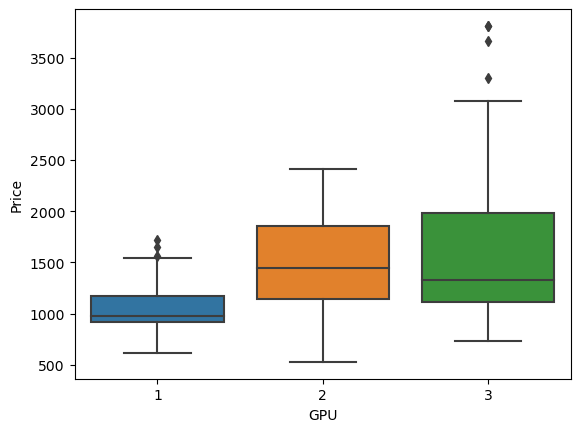

In [30]:
sns.boxplot(x='GPU', y='Price', data=df)

##### OS Box Plot

<Axes: xlabel='OS', ylabel='Price'>

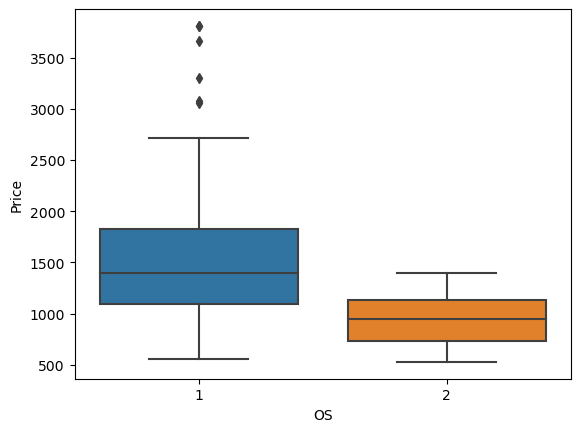

In [31]:
sns.boxplot(x='OS', y='Price', data=df)

##### CPU Core Box Plot

<Axes: xlabel='CPU_core', ylabel='Price'>

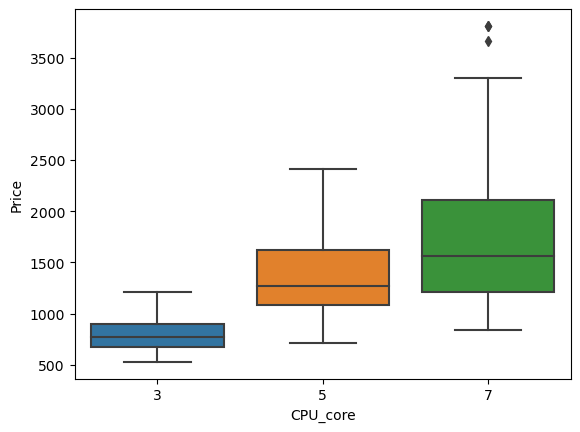

In [32]:
sns.boxplot(x='CPU_core', y='Price', data=df)

##### RAM GB Box Plot

<Axes: xlabel='RAM_GB', ylabel='Price'>

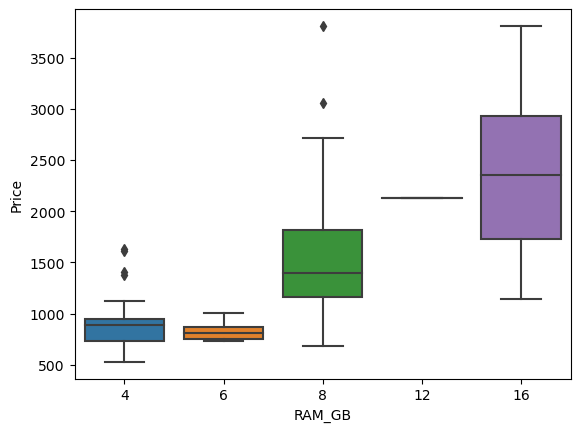

In [33]:
sns.boxplot(x='RAM_GB', y='Price', data=df)

##### Storage GB SSD Box Plot

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

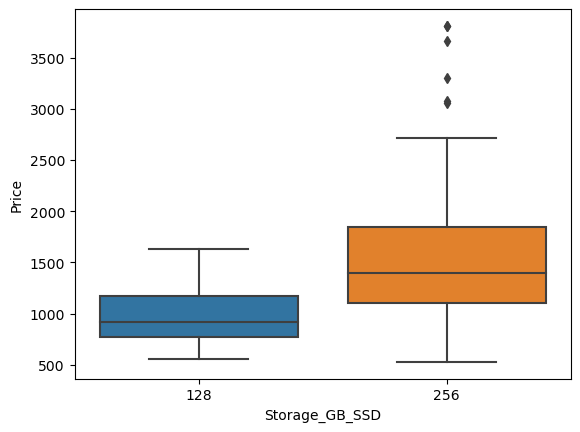

In [34]:
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

### Pearson Correlation and p-values

In [35]:
# Create an empty list to store individual DataFrames
correlation_frames = []

# Calculate correlations for each attribute
for param in ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    
    # Create a DataFrame for each attribute and append to the list
    correlation_df = pd.DataFrame({
        'Attribute': [param],
        'Pearson_Coefficient': [pearson_coef],
        'P_Value': [p_value]
    })
    
    correlation_frames.append(correlation_df)

# Concatenate the individual DataFrames into a single DataFrame
correlation_results = pd.concat(correlation_frames, ignore_index=True)

# Print the DataFrame with correlation results
correlation_results

,Attribute,Pearson_Coefficient,P_Value
0,RAM_GB,0.549297,3.681561e-20
1,CPU_frequency,0.366666,5.502463e-09
2,Storage_GB_SSD,0.243421,1.489892e-04
3,Screen_Size_inch,-0.110565,8.876457e-02
4,Weight_pounds,-0.050312,4.397694e-01
5,CPU_core,0.459398,7.912950e-14
6,OS,-0.221730,5.696643e-04
7,GPU,0.288298,6.166950e-06
8,Category,0.286243,7.225696e-06


based on the results above we can conclude that:

- ``RAM_GB`` have a strong positive correlation. Laptops with higher RAM generally tend to be more expensive.
- ``CPU_frequency`` have a moderate positive correlation. Higher CPU frequency is associated with higher price, but the relationship is weaker than RAM.
- ``Storage_GB_SSD`` have a weak positive correlation. More SSD storage slightly increases price on average.
- ``Screen_Size_inch`` have a very weak negative correlation. Larger screens might be slightly cheaper, but not significantly.
- ``Weight_pounds`` have a negligible correlation. Laptop weight has almost no impact on price.
- ``CPU_core`` have a moderate positive correlation. Laptops with more CPU cores tend to be more expensive.
- ``OS`` have a weak negative correlation. Certain operating systems might be slightly cheaper, but again, the effect is weak.
- ``GPU`` have a weak positive correlation. Better GPUs have a slight positive association with price.
- ``Category`` have a weak positive correlation. Laptop category likely has a minor influence on price, but the specific relationships within categories need further investigation.

RAM and CPU core count have the strongest positive correlations with price, suggesting they are significant factors influencing laptop cost.

Other features like storage, screen size, weight, and OS have weaker or negligible correlations, indicating their limited impact on price variations.

P-values below 0.05 indicate statistical significance, supporting the observed correlations. However, even statistically significant correlations don't imply causation. Other factors not included in the analysis might also influence price.